In [43]:
import numpy as np

# Partial derivative filters
def Gx(x, y):
    s = 1
    return - x / (2 * np.pi * s**4) * np.exp(-(np.square(x) + np.square(y)) / (2 * s**2))


def Gy(x, y):
    s = 1
    return - y / (2 * np.pi * s**4) * np.exp(-(np.square(x) + np.square(y)) / (2 * s**2))

In [44]:
x = np.arange(-5, 6, 1)
y = np.arange(-5, 6, 1)
xv, yv = np.meshgrid(x, y)

Gx_filter = Gx(xv, yv)
Gy_filter = Gy(xv, yv)
sample_x = 7
sample_y = 5
print(Gx_filter[sample_y, sample_x], xv[sample_y, sample_x], yv[sample_y, sample_x])

-0.04307855860369727 2 0


(378, 504)


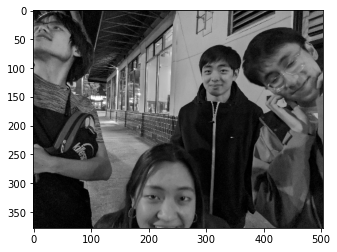

In [26]:
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps

# load image as pixel array
og_image = Image.open("test.jpg")
gray_image = ImageOps.grayscale(og_image)
image = np.array(gray_image)

image = image[::8, ::8]
print(image.shape)
plt.imshow(image, cmap="gray")

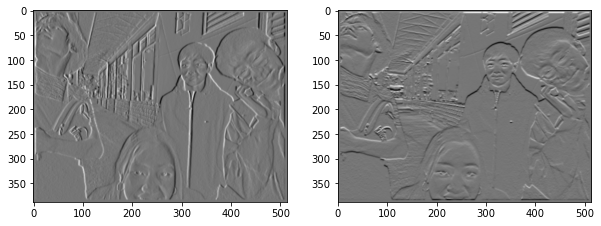

In [45]:
from scipy import signal

horz_edges = signal.convolve2d(image, Gx_filter)
vert_edges = signal.convolve2d(image, Gy_filter)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(horz_edges, cmap="gray")
axs[1].imshow(vert_edges, cmap="gray")

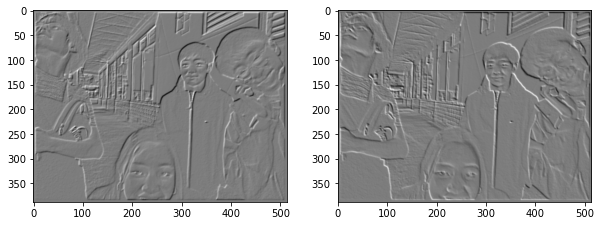

In [48]:
import math

diag1_edges = 1 / math.sqrt(2) * horz_edges + 1 / math.sqrt(2) * vert_edges
diag2_edges = 1 / math.sqrt(2) * horz_edges - 1 / math.sqrt(2) * vert_edges

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(diag_edges, cmap="gray")
axs[1].imshow(diag2_edges, cmap="gray")